## Name: Aman P

## Implementing Feedforward neural networks with Keras and TensorFlowfor classification of hand-written MNIST dataset using below steps:
    a.Import the necessary packages
    b.Load the training and testing data
    c.Define the network architecture using Keras
    d.Train the model using SGDwith 11 epochs
    e.Evaluate the network
    f.Plot the training loss and accuracy 

In [39]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
import pandas as pd

In [40]:
# Load the data from CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Separate features and labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Reshape the data to (num_samples, 28, 28, 1) for convolutional network


# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

In [45]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [46]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [47]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(28*28,)),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax'),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='sgd',metrics=['accuracy'],loss=SparseCategoricalCrossentropy())

In [49]:
epochs = 11
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/11
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6889 - accuracy: 0.8018 - val_loss: 0.3643 - val_accuracy: 0.8974
Epoch 2/11
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3557 - accuracy: 0.8976 - val_loss: 0.3191 - val_accuracy: 0.9088
Epoch 3/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3296 - accuracy: 0.9068 - val_loss: 0.3071 - val_accuracy: 0.9147
Epoch 4/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3189 - accuracy: 0.9109 - val_loss: 0.3006 - val_accuracy: 0.9145
Epoch 5/11
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3125 - accuracy: 0.9131 - val_loss: 0.2998 - val_accuracy: 0.9171
Epoch 6/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3082 - accuracy: 0.9141 - val_loss: 0.2937 - val_accuracy: 0.9167
Epoch 7/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3057 - accuracy: 0.9150 - val_loss: 0.2983 - val_accuracy:

313/313 [==============================] - 1s 2ms/step
Actual no: 7 Predicted no: 7


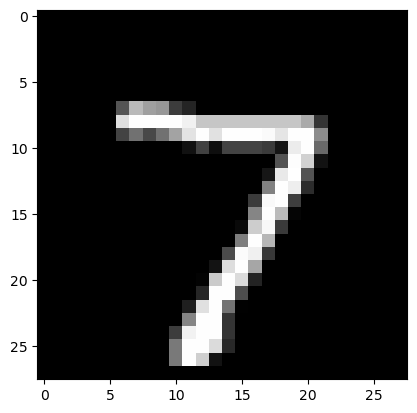

Actual no: 2 Predicted no: 2


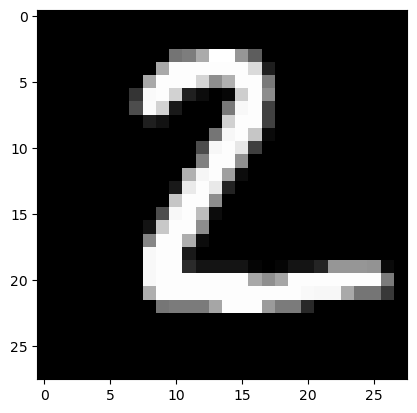

Actual no: 1 Predicted no: 1


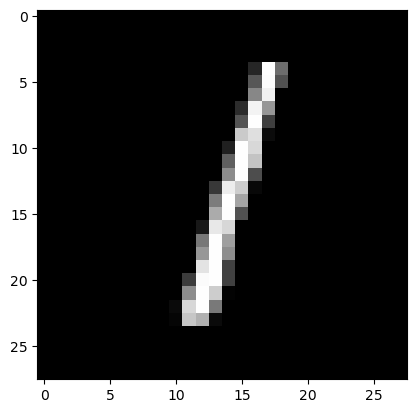

Actual no: 0 Predicted no: 0


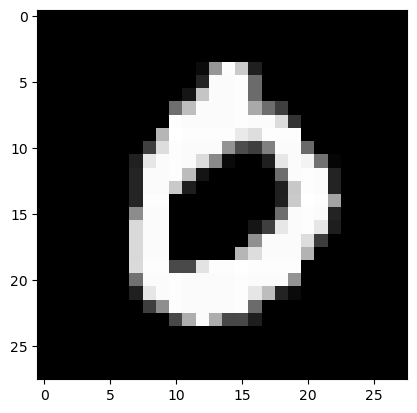

Actual no: 4 Predicted no: 4


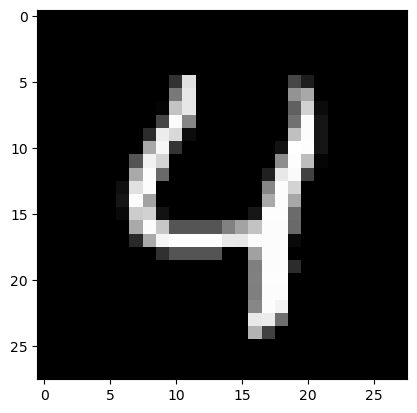

Actual no: 1 Predicted no: 1


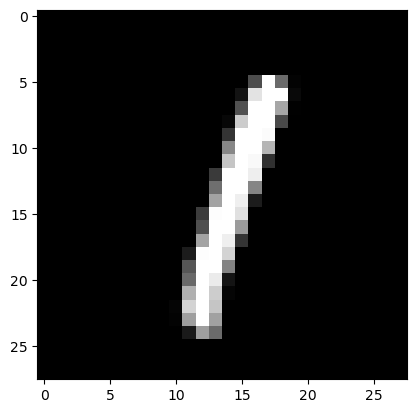

Actual no: 4 Predicted no: 4


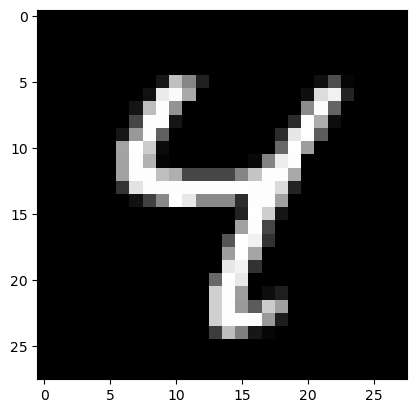

Actual no: 9 Predicted no: 9


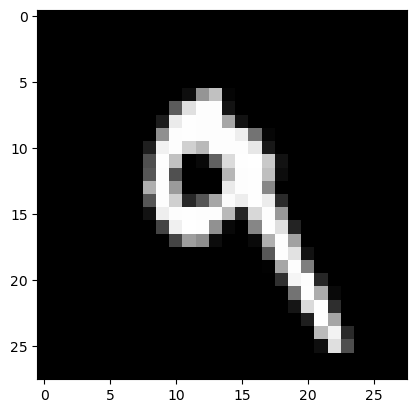

Actual no: 5 Predicted no: 6


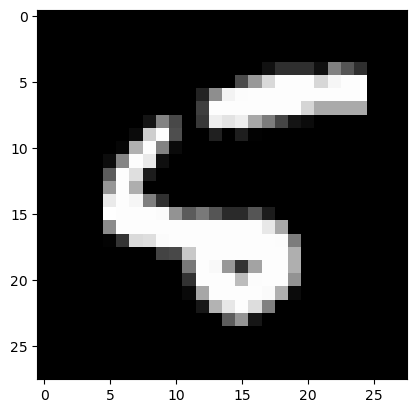

Actual no: 9 Predicted no: 9


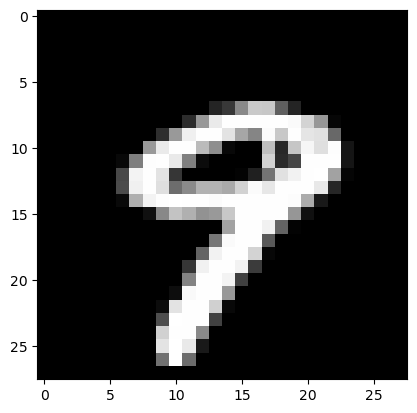

In [32]:
# Function to display actual and predicted numbers with images
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(X_test)

def display_actual_vs_predicted(n):
    actual_number = y_test[n]
    predicted_number = np.argmax(predictions[n])

    plt.imshow(X_test[n].reshape(28, 28), cmap='gray')
    print("Actual no:", actual_number,"Predicted no:",predicted_number)
    plt.show()

# Display a few examples
for i in range(10):
    display_actual_vs_predicted(i)


In [33]:
from sklearn.metrics import classification_report
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.97      0.98      0.97      1135
           2       0.90      0.86      0.88      1032
           3       0.95      0.77      0.85      1010
           4       0.91      0.90      0.91       982
           5       0.81      0.79      0.80       892
           6       0.92      0.95      0.93       958
           7       0.90      0.94      0.92      1028
           8       0.76      0.87      0.81       974
           9       0.88      0.88      0.88      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [34]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.3653859794139862
Test accuracy: 89.40000534057617


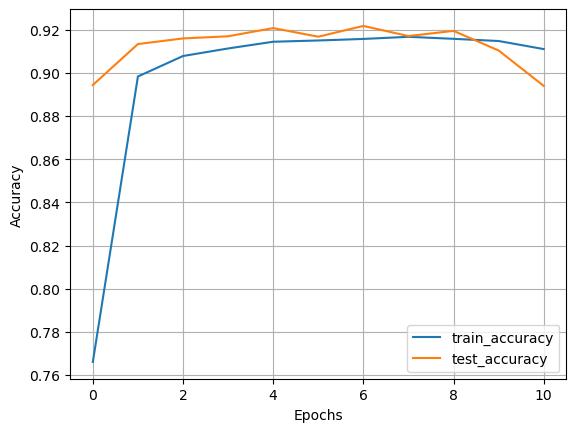

In [35]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

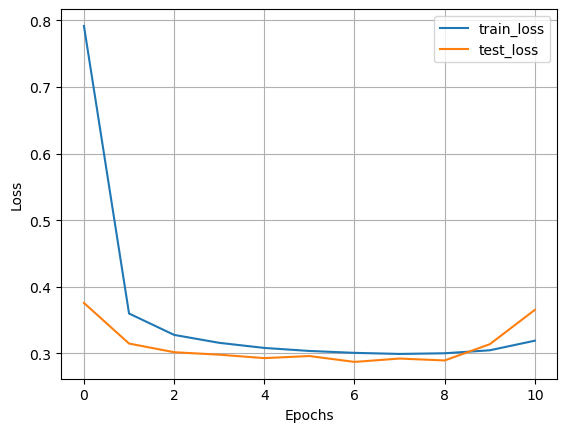

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();